In [1]:
import networkx as nx
import os
import pandas as pd
import matplotlib.pyplot as plt
from community_detection import best_of_louvain, compute_modularity
from tqdm.notebook import tqdm

In [2]:
def load_graph(file_path):
    """load graph from file with adjacency matrix"""
    adj_matrix = pd.read_csv(file_path, header=None).to_numpy()
    G = nx.from_numpy_array(adj_matrix)
    return G

In [3]:
# load graphs
graphs = {}
for file_path in os.listdir('competition'):
    graphs[file_path] = load_graph(os.path.join('competition', file_path))

In [4]:
def detect_communities(graphs):
    results = {}
    total = len(graphs)
    for name, G in tqdm(graphs.items(), desc="Detecting communities", total=total):
        partition = best_of_louvain(G, 1000, eps=1e-9)
        results[name] = partition
    return results

In [5]:
results = detect_communities(graphs)

Detecting communities:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
def draw_communities(G, partition):
    """Draw the graph with communities colored differently."""
    pos = nx.kamada_kawai_layout(G)
    cmap = plt.get_cmap('rainbow', max(partition.values()) + 1)
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

Graph: D1-K=2.csv


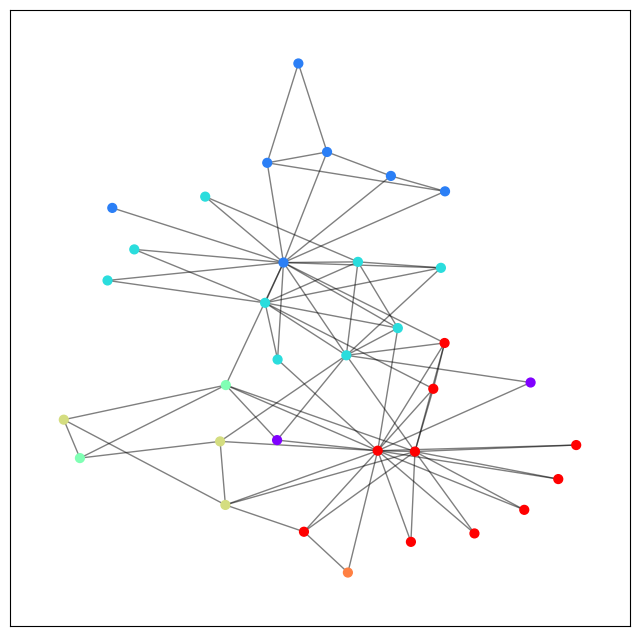

Graph: D1-UNC.csv


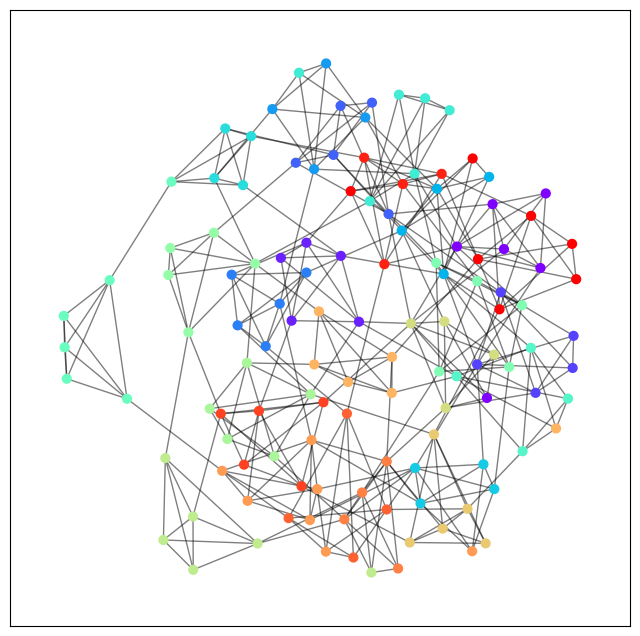

Graph: D2-K=7.csv


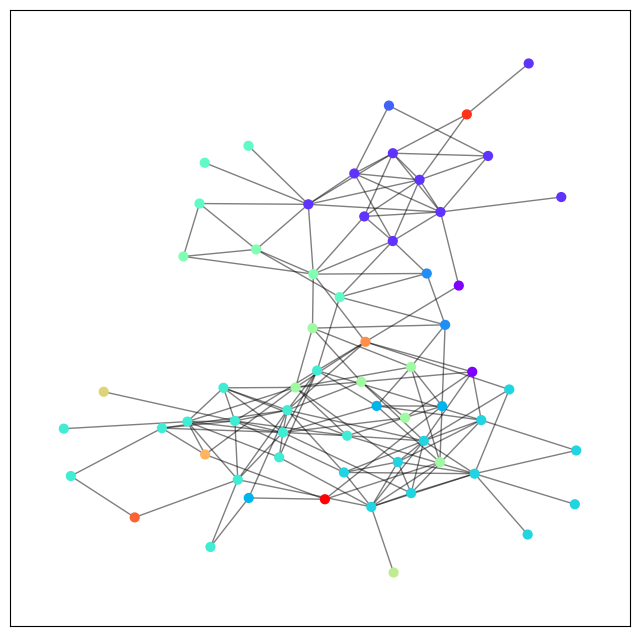

Graph: D2-UNC.csv


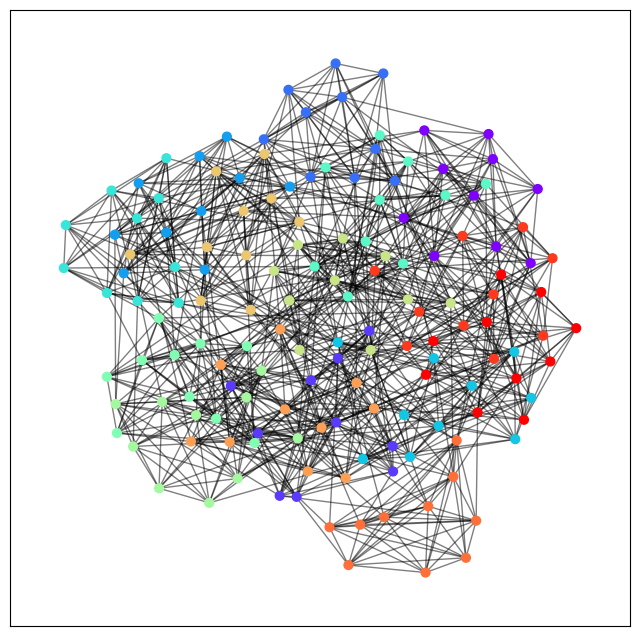

Graph: D3-K=12.csv


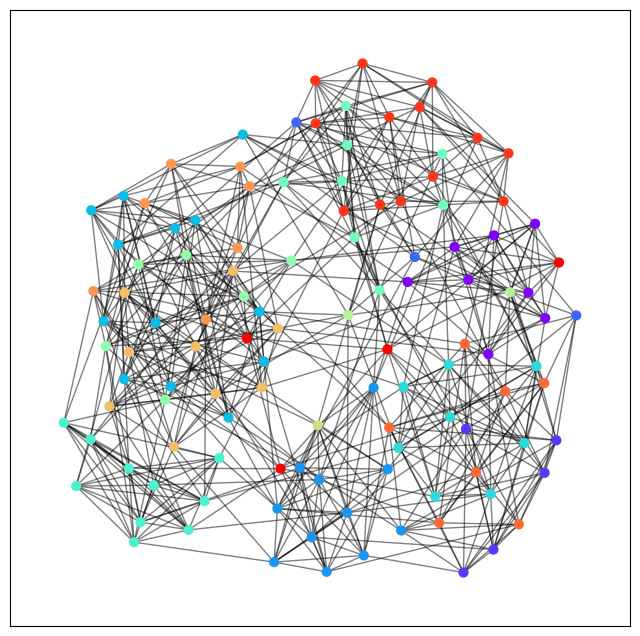

Graph: D3-UNC.csv


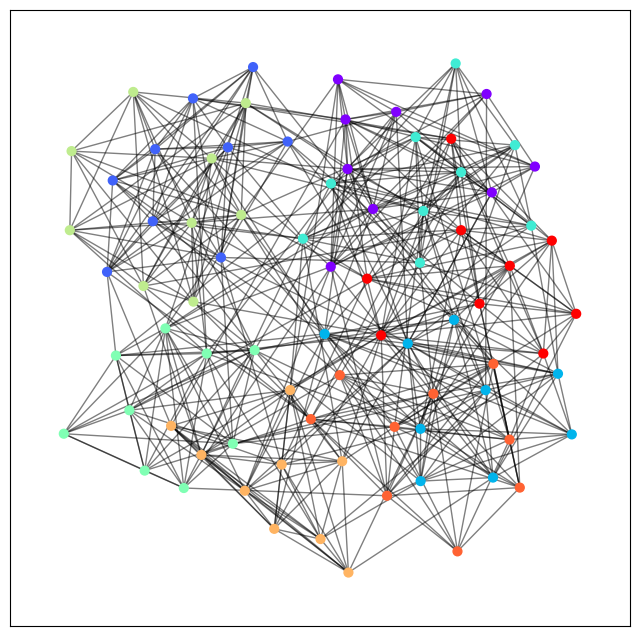

In [7]:
for name, community in results.items():
    print(f"Graph: {name}")
    draw_communities(graphs[name], community)

In [8]:
for name, partition in results.items():
    G = graphs[name]
    modularity = compute_modularity(G, partition)
    print(f"Graph: {name}, Modularity: {modularity:.4f}")

Graph: D1-K=2.csv, Modularity: 0.3346
Graph: D1-UNC.csv, Modularity: 0.6058
Graph: D2-K=7.csv, Modularity: 0.3693
Graph: D2-UNC.csv, Modularity: 0.6512
Graph: D3-K=12.csv, Modularity: 0.5009
Graph: D3-UNC.csv, Modularity: 0.5519


In [9]:
def save_communities(results, output_dir='results'):
    os.makedirs(output_dir, exist_ok=True)
    for name, partition in results.items():
        with open(os.path.join(output_dir, f"{name}"), 'w') as f:
            for node, comm in partition.items():
                f.write(f"{node},{comm}\n")

In [10]:
save_communities(results)

In [11]:
def show_how_many_communities(results):
    for name, partition in results.items():
        num_communities = len(set(partition.values()))
        print(f"Graph: {name}, Number of communities: {num_communities}")

In [12]:
show_how_many_communities(results)

Graph: D1-K=2.csv, Number of communities: 7
Graph: D1-UNC.csv, Number of communities: 25
Graph: D2-K=7.csv, Number of communities: 17
Graph: D2-UNC.csv, Number of communities: 15
Graph: D3-K=12.csv, Number of communities: 16
Graph: D3-UNC.csv, Number of communities: 9
